Proyecto 1 - dsb05rt Grupo E

01. Extraction y 02. Transform

In [2]:
import numpy as np
import pandas as pd

import requests

from pprint import pprint
from datetime import datetime
import time
from datetime import timedelta

import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import glob
import re
from tqdm import tqdm
from urllib.parse import urlparse, parse_qs
from pathlib import Path
import matplotlib.patches as mpatches

In [4]:
#Importación del archivo de regiones

regiones='Regiones.xlsx'
df_regiones = pd.read_excel(regiones)

In [5]:
#Eliminación de las filas con valores vacíos
df_regiones=df_regiones.dropna()

In [6]:
#Comprobación del tipo de datos
df_regiones. info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 46
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     24 non-null     object 
 1   geo_limit  24 non-null     object 
 2   geo_id     24 non-null     float64
dtypes: float64(1), object(2)
memory usage: 768.0+ bytes


In [7]:
#Cambio de la columna geo_id de float a int
df_regiones['geo_id']=df_regiones['geo_id'].astype(int)

In [8]:
#Comprobación de que está todo correctamente
df_regiones

,Region,geo_limit,geo_id
0,Peninsular,peninsular,8741
2,Canarias,canarias,8742
4,Baleares,baleares,8743
6,Ceuta,ceuta,8744
8,Melilla,melilla,8745
10,Andalucía,ccaa,4
12,Aragón,ccaa,5
14,Cantabria,ccaa,6
16,Castilla la Mancha,ccaa,7
18,Castilla y León,ccaa,8


In [9]:
#Sacar el balance por comunidad
responses=[]

for index, row in df_regiones.iterrows():
    geo_id = row['geo_id']
    geo_limit = row['geo_limit']
    region=row['Region']
    URL = "https://apidatos.ree.es/es/datos/"
    URL = URL + "balance/balance-electrico"
    params = {"start_date" : "2020-01-01T00:00",
          "end_date" : "2023-10-30T23:59",
          "time_trunc" : "year",
         'geo_limit': geo_limit,
          'geo_id':geo_id
         }

    response = requests.get(url=URL, params=params)
    if response.status_code == 200:
        df1 = pd.DataFrame({'Region': [region], 'geo_limit': [geo_limit], 'geo_id': [geo_id], 'JSON_data': [response.json()]})
        responses.append(df1)
    time.sleep(1)

In [10]:
data_balance=[]

for response in responses:
    json_data = response['JSON_data']
    region=response['Region'].values[0]
    
    for result in json_data[0]['included']:
        tipo_energia = result['type']
    
        for subtipo in result['attributes']['content']:
            subtipo_energia = subtipo['attributes']['title']


            for datos in result['attributes']['content'][0]['attributes']['values']:
                valores = datos['value']
                porcentaje = datos['percentage']
                fecha_original = datos['datetime']
                fecha_objeto = datetime.strptime(fecha_original, '%Y-%m-%dT%H:%M:%S.%f%z')
                fecha = fecha_objeto.strftime('%Y-%m-%d')
    
                data_balance.append([region,tipo_energia, subtipo_energia, valores,porcentaje,fecha])

In [11]:
balance = pd.DataFrame(data_balance, columns = ['Region','Tipo', 'Subtipo', 'Valores', 'Porcentaje', 'Fecha'])

In [12]:
balance

,Region,Tipo,Subtipo,Valores,Porcentaje,Fecha
0,Peninsular,Renovable,Hidráulica,3.063172e+07,0.276947,2020-01-01
1,Peninsular,Renovable,Hidráulica,2.962601e+07,0.243917,2021-01-01
2,Peninsular,Renovable,Hidráulica,1.791111e+07,0.153486,2022-01-01
3,Peninsular,Renovable,Hidráulica,1.774428e+07,0.162700,2023-01-01
4,Peninsular,Renovable,Eólica,3.063172e+07,0.276947,2020-01-01
...,...,...,...,...,...,...
3635,Región de Murcia,Demanda,Saldo de intercambios,-6.672973e+06,0.013789,2023-01-01
3636,Región de Murcia,Demanda,Demanda en b.c.,-4.627715e+06,0.008899,2020-01-01
3637,Región de Murcia,Demanda,Demanda en b.c.,-4.317787e+06,0.008128,2021-01-01
3638,Región de Murcia,Demanda,Demanda en b.c.,-6.095335e+06,0.010073,2022-01-01


In [13]:
#Intercambios de energía y saldos de los últimos 3 años


URL = "https://apidatos.ree.es/es/datos/"
URL = URL + "intercambios/todas-fronteras-fisicos"
params = {"start_date" : "2020-01-01T00:00",
          "end_date" : "2023-10-30T23:59",
          "time_trunc" : "year"
         }
response = requests.get(url = URL, params = params)



In [14]:
print(response.text)

{"data":{"type":"Intercambios programados por frontera","id":"int21","attributes":{"title":"Intercambios programados por frontera","last-update":"2020-01-01T00:05:53.000+01:00","description":null},"meta":{"cache-control":{"cache":"MISS"}}},"included":[{"type":"francia","id":"Francia","attributes":{"title":"francia","last-update":"2020-02-10T08:17:17.000+01:00","description":null,"magnitude":null,"content":[{"type":"Exportaci\u00f3n","id":"10310","groupId":"Francia","attributes":{"title":"Exportaci\u00f3n","description":null,"color":"#28b3da","type":"export","magnitude":null,"composite":false,"last-update":"2020-02-10T08:17:17.000+01:00","values":[{"value":-6192458.406,"percentage":0.3515611967802713,"datetime":"2020-01-01T00:00:00.000+01:00"},{"value":-6280765.213,"percentage":0.3448692939616351,"datetime":"2021-01-01T00:00:00.000+01:00"},{"value":-13379618.752,"percentage":0.746271529330131,"datetime":"2022-01-01T00:00:00.000+01:00"},{"value":-7185725.607,"percentage":0.53773697213289

In [15]:
data_intercambios=response.json()

In [16]:
data_intercambios_pais=[]
for datos in data_intercambios['included']:
    pais=datos['id']
    for datos_paises in datos['attributes']['content']:
        tipo_intercambio=datos_paises['type']
        for valores_paises in datos_paises['attributes']['values']:
            valor= valores_paises['value']
            porcentaje=valores_paises['percentage']
            fecha_original = valores_paises['datetime']
            fecha_objeto = datetime.strptime(fecha_original, '%Y-%m-%dT%H:%M:%S.%f%z')
            fecha = fecha_objeto.strftime('%Y-%m-%d')
    
            data_intercambios_pais.append([pais,tipo_intercambio, valor, porcentaje, fecha])

In [17]:
intercambios=pd.DataFrame(data_intercambios_pais, columns = ['País','Tipo intercambio', 'Valores', 'Porcentaje', 'Fecha'])

In [18]:
intercambios

,País,Tipo intercambio,Valores,Porcentaje,Fecha
0,Francia,Exportación,-6.192458e+06,0.351561,2020-01-01
1,Francia,Exportación,-6.280765e+06,0.344869,2021-01-01
2,Francia,Exportación,-1.337962e+07,0.746272,2022-01-01
3,Francia,Exportación,-7.185726e+06,0.537737,2023-01-01
4,Francia,Importación,1.142171e+07,0.648439,2020-01-01
5,Francia,Importación,1.193125e+07,0.655131,2021-01-01
6,Francia,Importación,4.549001e+06,0.253728,2022-01-01
7,Francia,Importación,6.177175e+06,0.462263,2023-01-01
8,Francia,saldo,5.229252e+06,1.000000,2020-01-01
9,Francia,saldo,5.650486e+06,1.000000,2021-01-01


In [19]:
#Cortes de energía de los últimos 5 años
URL = "https://apidatos.ree.es/es/datos/"
URL = URL + "transporte/numero-cortes"


params = {"start_date" : "2019-01-01T00:00",
          "end_date"   : "2023-12-01T00:00",
          "time_trunc" : "year",
              }
response = requests.get(url = URL, params = params)


In [20]:
data_cortes=response.json()

In [21]:
data_cortes_comunidades=[]

for valores in data_cortes['included'][0]['attributes']['content'][0]['attributes']['values']:
    valor=valores['value']
    fecha_original = valores['datetime']
    fecha_objeto = datetime.strptime(fecha_original, '%Y-%m-%dT%H:%M:%S.%f%z')
    fecha = fecha_objeto.strftime('%Y-%m-%d')
    data_cortes_comunidades.append([valor, fecha])

In [22]:
cortes=pd.DataFrame(data_cortes_comunidades, columns = ['Cortes', 'Fecha'])

In [23]:
cortes

,Cortes,Fecha
0,11,2019-01-01
1,17,2020-01-01
2,22,2021-01-01
3,31,2022-01-01
4,19,2023-01-01


In [87]:
#Evolución de las potencias instaladas

In [24]:
#información de la web de la que vamos a sacar los datos
URL = "https://apidatos.ree.es/es/datos/"
URL = URL + "generacion/potencia-instalada"
params = {"start_date" : "2020-01-01T00:00",
          "end_date" : "2023-10-31T23:59",
          "time_trunc" : "year"
         }

#sacamos los datos con request e imprimimos los resultados:

response = requests.get(url = URL, params = params)
response

<Response [200]>

In [26]:
#dataframe con los resultados de la evolución de las potencias instaladas
data=response.json()
data_df=[]

for r in data["included"]:
      type_=r["type"]
      total=r["attributes"]["total"]
      for value_dict in r["attributes"]["values"]:
        valor = value_dict["value"]
        percentage = value_dict["percentage"]
        fecha_original= value_dict["datetime"]
        fecha_objeto = datetime.strptime(fecha_original, '%Y-%m-%dT%H:%M:%S.%f%z')
        fecha = fecha_objeto.strftime('%Y-%m-%d')

        data_df.append([type_, total, valor, percentage,fecha])
evol_potencias=pd.DataFrame(data=data_df, columns=["Tipo","Total","Valor", "Porcentaje","Fecha"])
evol_potencias

,Tipo,Total,Valor,Porcentaje,Fecha
0,Hidráulica,17097.410,17099.311,0.154147,2020-12-01
1,Hidráulica,17097.410,17094.975,0.150565,2021-12-01
2,Hidráulica,17097.410,17094.975,0.143214,2022-12-01
3,Hidráulica,17097.410,17097.410,0.137352,2023-10-01
4,Turbinación bombeo,3331.400,3331.400,0.030032,2020-12-01
...,...,...,...,...,...
67,Residuos renovables,170.112,170.112,0.001367,2023-10-01
68,Potencia total,124478.678,110928.729,1.000000,2020-12-01
69,Potencia total,124478.678,113538.694,1.000000,2021-12-01
70,Potencia total,124478.678,119366.467,1.000000,2022-12-01


In [90]:
#Pérdidas de transporte

In [27]:
df = pd.read_excel("Regiones.xlsx")

df_1 = df.dropna()
df_1["geo_id"] =df_1 ["geo_id"].astype(int)

geo_limits = df_1 ["geo_limit"]

geo_ids = df_1 ["geo_id"]


/var/folders/d1/031rn2653ks13f7byzh2zxpr0000gn/T/ipykernel_2396/4187609275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["geo_id"] =df_1 ["geo_id"].astype(int)


In [28]:
from datetime import datetime, timedelta

fechas_inicio = [(datetime(year = 2022, month = 1, day = 1) + timedelta(days = i)).strftime("%Y-%m-%dT00:00") for i in range(2000)]

fechas_fin = [(datetime(year = 2023, month = 12, day = 31) + timedelta(days = i)).strftime("%Y-%m-%dT23:59") for i in range(2000)]

In [29]:
url = "https://apidatos.ree.es/es/datos/"
endpoint = url + "demanda/perdidas-transporte"


lista_trasnporte_perdidas_region = list()


for z, e in zip(geo_limits, geo_ids):


    params = {"start_date" : "2021-01-21T00:00",
              "end_date"   : "2022-12-21T00:00",
              "time_trunc" : "month",
              "geo_limit"  : z,
              "geo_ids"    : e}

    response = requests.get(url = endpoint, params = params)

    if response.status_code == 200:
        lista_trasnporte_perdidas_region.append(response)

    time.sleep(2)

In [30]:
data = []
for response in lista_trasnporte_perdidas_region:
    if response.status_code == 200:
        response_data = response.json()
        data.append(response_data)

In [31]:
data_df=[]
for item in data:
    type_value = item["data"]["type"]
    for value_dict in item["included"]:
        for value in value_dict['attributes']['values']:
            valor = value["value"]
            percentaje = value["percentage"]
            fecha_original= value["datetime"]
            fecha_objeto = datetime.strptime(fecha_original, '%Y-%m-%dT%H:%M:%S.%f%z')
            fecha = fecha_objeto.strftime('%Y-%m-%d')
            data_df.append([type_value, valor, percentaje, fecha])
perdidas_transporte=pd.DataFrame(data=data_df, columns=["Tipo", "Valor", "Porcentaje", "Fecha"])

In [32]:
perdidas_transporte

,Tipo,Valor,Porcentaje,Fecha
0,Pérdidas de transporte,154439.044,0.019710,2021-01-01
1,Pérdidas de transporte,446570.114,0.022714,2021-02-01
2,Pérdidas de transporte,380332.371,0.018007,2021-03-01
3,Pérdidas de transporte,317091.405,0.016487,2021-04-01
4,Pérdidas de transporte,296079.637,0.015112,2021-05-01
...,...,...,...,...
331,Pérdidas de transporte,757192.276,0.986871,2022-08-01
332,Pérdidas de transporte,724251.289,0.986168,2022-09-01
333,Pérdidas de transporte,729372.535,0.985684,2022-10-01
334,Pérdidas de transporte,709312.287,0.985705,2022-11-01


In [33]:
## Demanda maxima diaria
df_1 = df_regiones[df_regiones['geo_limit'] != 'ccaa']


geo_limits = df_1 ["geo_limit"]

geo_ids = df_1 ["geo_id"]

In [34]:
url = "https://apidatos.ree.es/es/datos/"
endpoint = url + "demanda/demanda-maxima-diaria"


data = []

for z, e in zip(geo_limits, geo_ids):


    params = {"start_date" : '2022-01-01T00:00',
              "end_date"   : '2023-12-31T00:00',
              "time_trunc" : "month",
              "geo_limit"  : z,
              "geo_ids"    : e}

    response = requests.get(url = endpoint, params = params)

    if response.status_code == 200:
        response_data = response.json()
        data.append(response_data)

    time.sleep(1)

In [35]:
data_df=[]
for item in data:
    type_value = item["data"]["type"]
    for value_dict in item["included"]:
        for value in value_dict['attributes']['values']:
            valor = value["value"]
            percentaje = value["percentage"]
            fecha_original = value["datetime"]
            fecha_objeto = datetime.strptime(fecha_original, '%Y-%m-%dT%H:%M:%S.%f%z')
            fecha = fecha_objeto.strftime('%Y-%m-%d')
            data_df.append([type_value, valor, percentaje, fecha])
demanda_maxima_diaria=pd.DataFrame(data=data_df, columns=["tipo", "valor", "percentaje", "date"])

In [36]:
demanda_maxima_diaria['date'] = demanda_maxima_diaria['date'].str.split('T', expand=True)[0]

In [37]:
demanda_maxima_diaria

,tipo,valor,percentaje,date
0,Demanda máxima diaria,773466.922,1,2022-01-20
1,Demanda máxima diaria,734153.244,1,2022-02-01
2,Demanda máxima diaria,704263.332,1,2022-03-04
3,Demanda máxima diaria,721864.654,1,2022-04-05
4,Demanda máxima diaria,675847.248,1,2022-05-19
...,...,...,...,...
113,Demanda máxima diaria,769.122,1,2023-08-11
114,Demanda máxima diaria,671.197,1,2023-09-01
115,Demanda máxima diaria,604.094,1,2023-10-06
116,Demanda máxima diaria,532.037,1,2023-11-14


In [ ]:
#Evolución Energía Renovable VS No Renovable

In [38]:
#información de la web de la que vamos a sacar los datos
URL = "https://apidatos.ree.es/es/datos/"
URL = URL + "generacion/evolucion-renovable-no-renovable"
params = {"start_date" : "2020-01-01T00:00",
          "end_date" : "2023-10-31T23:59",
          "time_trunc" : "year"
         }

#sacamos los datos con request e imprimimos los resultados:

response = requests.get(url = URL, params = params)

In [39]:
#sacamos los datos con request:

response = requests.get(url = URL, params = params)

#sacamos los datos a un df:


data=response.json()
data_df=[]


for r in data["included"]:
      tipo=r["type"]
      for value_dict in r["attributes"]["values"]:
            percentage = value_dict["percentage"]
            date= value_dict["datetime"]
            valor=value_dict["value"]

            data_df.append([tipo, percentage, date, valor])
tipos_energia=pd.DataFrame(data=data_df, columns=["Tipo", "Porcentaje", "Fecha", "Valor"])



In [40]:
#formateamos el campo date para poder utilizarlo correctamente
tipos_energia['Fecha'] = pd.to_datetime(tipos_energia['Fecha'])


tipos_energia['Fecha'] = tipos_energia['Fecha'].dt.strftime('%Y-%m-%d')

In [102]:
tipos_energia

,Tipo,Porcentaje,Fecha,Valor
0,Renovable,0.439959,2020-01-01,1.106052e+08
1,Renovable,0.467130,2021-01-01,1.214591e+08
2,Renovable,0.422134,2022-01-01,1.166832e+08
3,Renovable,0.491915,2023-01-01,1.094443e+08
4,No renovable,0.560041,2020-01-01,1.407936e+08
5,No renovable,0.532870,2021-01-01,1.385520e+08
6,No renovable,0.577866,2022-01-01,1.597294e+08
7,No renovable,0.508085,2023-01-01,1.130420e+08


In [ ]:
#Tipos de Energía Renovable

In [41]:
#información de la web de la que vamos a sacar los datos
URL = "https://apidatos.ree.es/es/datos/"
URL = URL + "generacion/estructura-renovables"
params = {"start_date" : "2020-01-01T00:00",
          "end_date" : "2023-10-31T23:59",
          "time_trunc" : "year"
         }

#sacamos los datos con request e imprimimos los resultados:

response = requests.get(url = URL, params = params)


In [42]:
#dataframe con los resultados de la energia renovable y sus tipos
data=response.json()
data_df=[]

for r in data["included"]:
      type_=r["type"]
      for value_dict in r["attributes"]["values"]:
            valor=value_dict["value"]
            percentage = value_dict["percentage"]
            date= value_dict["datetime"]

            data_df.append([type_, valor, percentage, date])
energia_renovable=pd.DataFrame(data=data_df, columns=["Tipo", "Valor", "Porcentaje", "Fecha"])




In [43]:
#formateamos el campo date para poder utilizarlo correctamente
energia_renovable['Fecha'] = pd.to_datetime(energia_renovable['Fecha'])


energia_renovable['Fecha'] = energia_renovable['Fecha'].dt.strftime('%Y-%m-%d')

In [106]:
energia_renovable

,Tipo,Valor,Porcentaje,Fecha
0,Hidráulica,3.063172e+07,0.276947,2020-01-01
1,Hidráulica,2.962601e+07,0.243917,2021-01-01
2,Hidráulica,1.790701e+07,0.153467,2022-01-01
3,Hidráulica,1.793739e+07,0.163895,2023-01-01
4,Hidroeólica,1.954023e+04,0.000177,2020-01-01
5,Hidroeólica,2.309824e+04,0.000190,2021-01-01
6,Hidroeólica,2.288084e+04,0.000196,2022-01-01
7,Hidroeólica,1.579679e+04,0.000144,2023-01-01
8,Eólica,5.490625e+07,0.496417,2020-01-01
9,Eólica,6.052566e+07,0.498321,2021-01-01


03. Load

In [44]:
#Función para subir datos
def subir_datos_a_airtable(API_KEY, BASE_ID, TABLE_ID, dataframe):
    airtable_base_url = "https://api.airtable.com/v0"
    
    # Headers
    headers = {"Authorization" : f"Bearer {API_KEY}",
               "Content-Type"  : "application/json"}
    datos = []
    
    for idx, row in dataframe.iterrows():
        data = {"fields": row.fillna("").to_dict()}
        datos.append(data)
    
    endpoint = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID}"
    counter = 0

    while counter < len(datos):
        print(f"Subiendo datos {counter} de {len(datos)}")
        datos_subir = datos[counter:counter+10]
        datos_subir = {"records": datos_subir}
        
        response = requests.post(url=endpoint, json=datos_subir, headers=headers)

        counter += 10


In [58]:
#Subiendo cortes 
API_KEY = "" 
BASE_ID = "" 
TABLE_ID = ""



subir_datos_a_airtable(API_KEY, BASE_ID, TABLE_ID, cortes)

Subiendo datos 0 de 5


In [26]:
#Subiendo tipos energia
API_KEY = "" 
BASE_ID = "" 
TABLE_ID = ""



subir_datos_a_airtable(API_KEY, BASE_ID, TABLE_ID, tipos_energia)

Subiendo datos 0 de 8


In [47]:
#Subiendo evolución potencias 
API_KEY = "" 
BASE_ID = "" 
TABLE_ID = ""



subir_datos_a_airtable(API_KEY, BASE_ID, TABLE_ID, evol_potencias)

Subiendo datos 0 de 72
Subiendo datos 10 de 72
Subiendo datos 20 de 72
Subiendo datos 30 de 72
Subiendo datos 40 de 72
Subiendo datos 50 de 72
Subiendo datos 60 de 72
Subiendo datos 70 de 72


In [46]:
#Subiendo perdidas de transporte
API_KEY = "" 
BASE_ID = "" 
TABLE_ID = ""



subir_datos_a_airtable(API_KEY, BASE_ID, TABLE_ID, perdidas_transporte)

Subiendo datos 0 de 336
Subiendo datos 10 de 336
Subiendo datos 20 de 336
Subiendo datos 30 de 336
Subiendo datos 40 de 336
Subiendo datos 50 de 336
Subiendo datos 60 de 336
Subiendo datos 70 de 336
Subiendo datos 80 de 336
Subiendo datos 90 de 336
Subiendo datos 100 de 336
Subiendo datos 110 de 336
Subiendo datos 120 de 336
Subiendo datos 130 de 336
Subiendo datos 140 de 336
Subiendo datos 150 de 336
Subiendo datos 160 de 336
Subiendo datos 170 de 336
Subiendo datos 180 de 336
Subiendo datos 190 de 336
Subiendo datos 200 de 336
Subiendo datos 210 de 336
Subiendo datos 220 de 336
Subiendo datos 230 de 336
Subiendo datos 240 de 336
Subiendo datos 250 de 336
Subiendo datos 260 de 336
Subiendo datos 270 de 336
Subiendo datos 280 de 336
Subiendo datos 290 de 336
Subiendo datos 300 de 336
Subiendo datos 310 de 336
Subiendo datos 320 de 336
Subiendo datos 330 de 336


In [107]:
#Subiendo demanda maxima diaria
API_KEY = "" 
BASE_ID = "" 
TABLE_ID = ""



subir_datos_a_airtable(API_KEY, BASE_ID, TABLE_ID, demanda_maxima_diaria)

Subiendo datos 0 de 113
Subiendo datos 10 de 113
Subiendo datos 20 de 113
Subiendo datos 30 de 113
Subiendo datos 40 de 113
Subiendo datos 50 de 113
Subiendo datos 60 de 113
Subiendo datos 70 de 113
Subiendo datos 80 de 113
Subiendo datos 90 de 113
Subiendo datos 100 de 113
Subiendo datos 110 de 113


In [18]:
#Subiendo energia renovable
API_KEY = "" 
BASE_ID = "" 
TABLE_ID = ""



subir_datos_a_airtable(API_KEY, BASE_ID, TABLE_ID, energia_renovable)

Subiendo datos 0 de 32
Subiendo datos 10 de 32
Subiendo datos 20 de 32
Subiendo datos 30 de 32


In [46]:
#Subiendo datos de intercambios
API_KEY = "" 
BASE_ID = "" 
TABLE_ID = ""



subir_datos_a_airtable(API_KEY, BASE_ID, TABLE_ID, intercambios)

Subiendo datos 0 de 48
Subiendo datos 10 de 48
Subiendo datos 20 de 48
Subiendo datos 30 de 48
Subiendo datos 40 de 48


In [ ]:
#Subiendo datos de balance
API_KEY = "" 
BASE_ID = "" 
TABLE_ID = ""



subir_datos_a_airtable(API_KEY, BASE_ID, TABLE_ID, balance)

In [50]:
#función para descrgar las tablas

def descargar_datos_airtable(API_KEY, BASE_ID, tabla):
    url = f"https://api.airtable.com/v0/{BASE_ID}/{tabla}"
    
    headers = { "Authorization": f"Bearer {API_KEY}",
                 "Content-Type": "application/json"}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data=response.json()
        records= data.get("records",[])
        
        if records:
            df = pd.DataFrame([record["fields"] for record in records])
            return df
        else:
            print("La tabla está vacía")
            return None
    else:
        print(f"Error al descargar datos de la tabla '{tabla}' en Airtable. Código de estado: {response.status_code}")
        return None

In [57]:
# prueba con cortes:
API_KEY = "" 
BASE_ID = "" 
tabla = "Cortes"

descargar_datos_airtable(API_KEY, BASE_ID, tabla)

,Cortes,Fecha
0,31,2022-01-01
1,16,2023-01-01
2,11,2019-01-01
3,22,2021-01-01
4,17,2020-01-01


In [51]:
# energia renovable:
API_KEY = "" 
BASE_ID = "" 
tabla = "Energia renovable"

descargar_datos_airtable(API_KEY, BASE_ID, tabla)

,Valor,Fecha,Porcentaje,Tipo
0,4.538310e+06,2020-01-01,0.041032,Solar térmica
1,1.094443e+08,2023-01-01,1.000000,Generación renovable
2,3.063172e+07,2020-01-01,0.276947,Hidráulica
3,6.052566e+07,2021-01-01,0.498321,Eólica
4,7.100726e+05,2023-01-01,0.006488,Residuos renovables
5,5.490625e+07,2020-01-01,0.496417,Eólica
6,1.166832e+08,2022-01-01,1.000000,Generación renovable
7,2.309824e+04,2021-01-01,0.000190,Hidroeólica
8,8.779407e+05,2021-01-01,0.007228,Residuos renovables
9,1.579679e+04,2023-01-01,0.000144,Hidroeólica


In [52]:
# Balance:
API_KEY = "" 
BASE_ID = "" 
tabla = "Balance"

descargar_datos_airtable(API_KEY, BASE_ID, tabla)

,Valores,Fecha,Subtipo,Porcentaje,Tipo,Region
0,2.649324e+06,2021-01-01,Motores diésel,0.009561,No-Renovable,Extremadura
1,4.157808e+06,2023-01-01,Nuclear,0.023372,No-Renovable,Cantabria
2,1.790701e+07,2022-01-01,Generación renovable,0.153467,Renovable,Melilla
3,2.962601e+07,2021-01-01,Hidráulica,0.121959,Renovable,Castilla la Mancha
4,2.962601e+07,2021-01-01,Solar térmica,0.121959,Renovable,Comunidad Valenciana
...,...,...,...,...,...,...
95,2.962601e+07,2021-01-01,Solar fotovoltaica,0.243917,Renovable,Melilla
96,3.776176e+06,2022-01-01,Cogeneración,0.011821,No-Renovable,Comunidad de Ceuta
97,3.776176e+06,2022-01-01,Motores diésel,0.011821,No-Renovable,Castilla y León
98,-6.733361e+06,2023-01-01,Consumos en bombeo,0.017279,Demanda,Andalucía


In [53]:
# Intercambios:
API_KEY = "" 
BASE_ID = "" 
tabla = "Intercambios"

descargar_datos_airtable(API_KEY, BASE_ID, tabla)

,Porcentaje,País,Tipo intercambio,Fecha,Valores
0,0.999936,Andorra,Exportación,2023-01-01,-1.687844e+05
1,1.000000,Portugal,saldo,2020-01-01,-1.456683e+06
2,0.574648,Marruecos,Importación,2021-01-01,6.881859e+05
3,1.000000,Marruecos,saldo,2023-01-01,-1.438878e+06
4,0.000027,Andorra,Importación,2022-01-01,7.850000e+00
...,...,...,...,...,...
91,0.148273,Marruecos,Importación,2023-01-01,3.032837e+05
92,0.632956,Marruecos,Exportación,2020-01-01,-7.066107e+05
93,0.746272,Francia,Exportación,2022-01-01,-1.337962e+07
94,0.648439,Francia,Importación,2020-01-01,1.142171e+07


In [54]:
# perdidas transporte:
API_KEY = "" 
BASE_ID = "" 
tabla = "Perdidas transporte"

descargar_datos_airtable(API_KEY, BASE_ID, tabla)

,Tipo,Valor,Porcentaje,Fecha
0,Pérdidas de transporte,724223.765,0.986179,2022-09-01
1,Pérdidas de transporte,296079.637,0.015112,2021-05-01
2,Pérdidas de transporte,15759.968,1.000000,2021-11-01
3,Pérdidas de transporte,17045.196,1.000000,2022-01-01
4,Pérdidas de transporte,9354.727,0.019651,2022-10-01
...,...,...,...,...
95,Pérdidas de transporte,17253.197,1.000000,2022-01-01
96,Pérdidas de transporte,15515.205,1.000000,2021-05-01
97,Pérdidas de transporte,471932.242,0.983439,2022-05-01
98,Pérdidas de transporte,15653.908,1.000000,2021-06-01


In [55]:
# Demanda maxima diaria:
API_KEY = "" 
BASE_ID = "" 
tabla = "Demanda máxima diaria"

descargar_datos_airtable(API_KEY, BASE_ID, tabla)

""
0
1
2


In [56]:
# tipos energía:
API_KEY = "" 
BASE_ID = "" 
tabla = "Tipos energía"

descargar_datos_airtable(API_KEY, BASE_ID, tabla)

,Tipo,Porcentaje,Fecha,Valor
0,Renovable,0.422134,2022-01-01,1.166832e+08
1,Renovable,0.439959,2020-01-01,1.106052e+08
2,Renovable,0.467130,2021-01-01,1.214591e+08
3,No renovable,0.577866,2022-01-01,1.597294e+08
4,No renovable,0.508085,2023-01-01,1.130420e+08
5,Renovable,0.491915,2023-01-01,1.094443e+08
6,No renovable,0.560041,2020-01-01,1.407936e+08
7,No renovable,0.532870,2021-01-01,1.385520e+08


04.Visualizaciones

In [ ]:
#Todas las fronteras físiscas (Intercambios de energía y saldos de los últimos tres años)

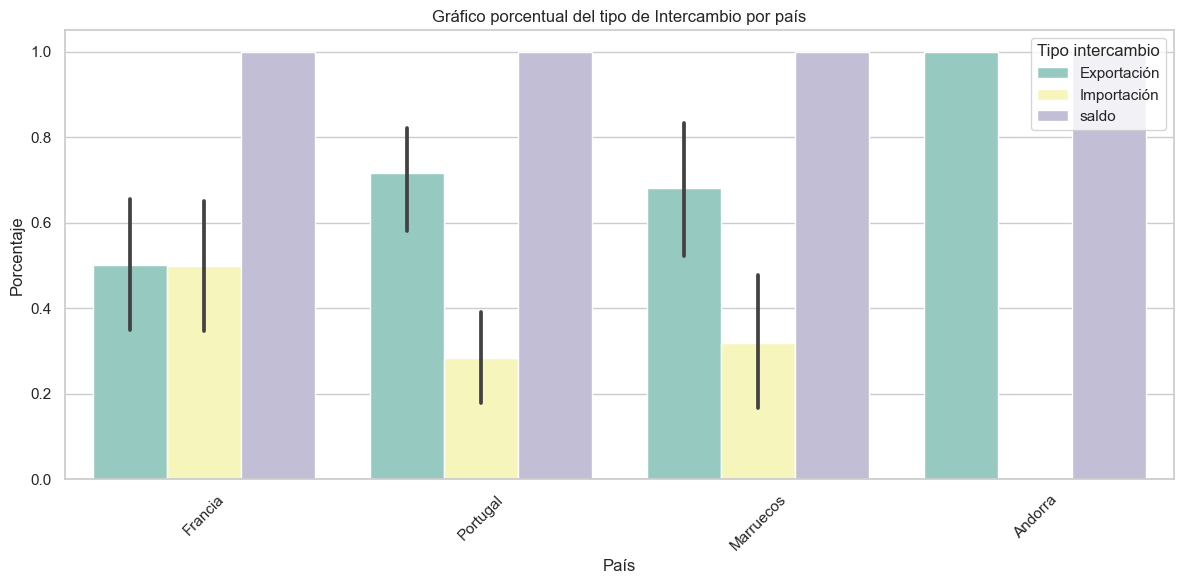

In [64]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(data=intercambios, x="País", y="Porcentaje", hue="Tipo intercambio", palette="Set3")

plt.title("Gráfico porcentual del tipo de Intercambio por país")
plt.xlabel("País")
plt.ylabel("Porcentaje")
plt.xticks(rotation=45)
plt.legend(title="Tipo intercambio", loc="upper right")
plt.tight_layout()

plt.show()

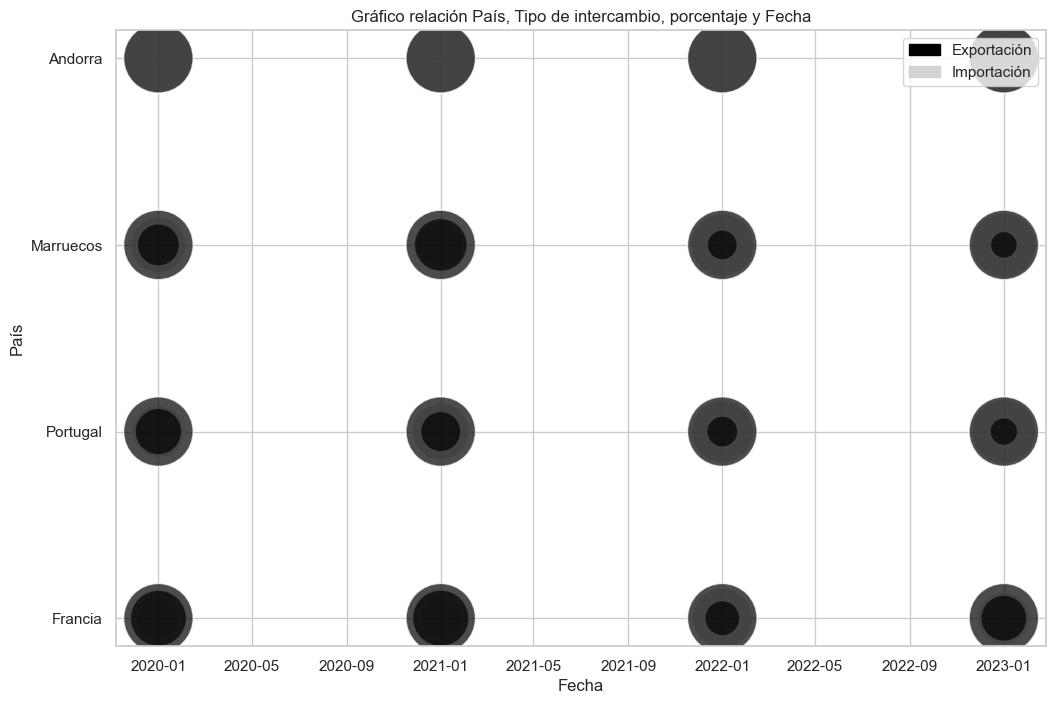

In [67]:
fecha = pd.to_datetime(intercambios['Fecha']) 


size = intercambios['Porcentaje'] * 2500  # Multiplicamos por un factor para ajustar el tamaño


colors = np.where(intercambios['Tipo intercambio'] == 'Exportación', '#D3D3D3', '#000000')


plt.figure(figsize=(12, 8))
scatter = plt.scatter(fecha, intercambios['País'], s=size, c=colors, alpha=0.7, edgecolors='w', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('País')
plt.title('Gráfico relación País, Tipo de intercambio, porcentaje y Fecha')


export_patch = mpatches.Patch(color='#000000', label='Exportación')
import_patch = mpatches.Patch(color='#D3D3D3', label='Importación')
legend = plt.legend(handles=[export_patch, import_patch], loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
plt.show()



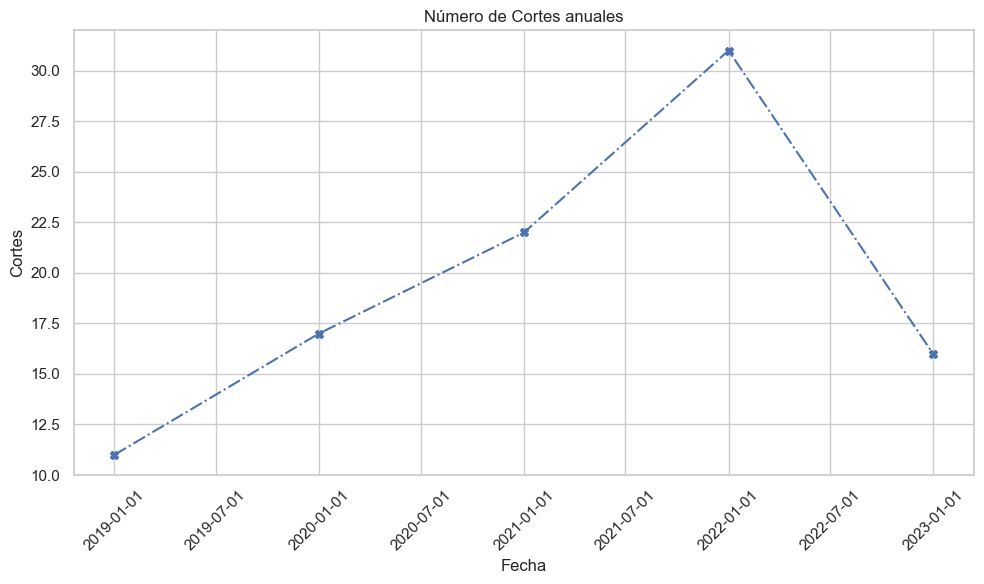

In [110]:
#Cortes
cortes['Fecha'] = pd.to_datetime(cortes['Fecha'])
plt.figure(figsize=(10, 6))
plt.plot(cortes['Fecha'], cortes['Cortes'], marker='X', linestyle='dashdot')
plt.xlabel('Fecha')
plt.ylabel('Cortes')
plt.title('Número de Cortes anuales')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

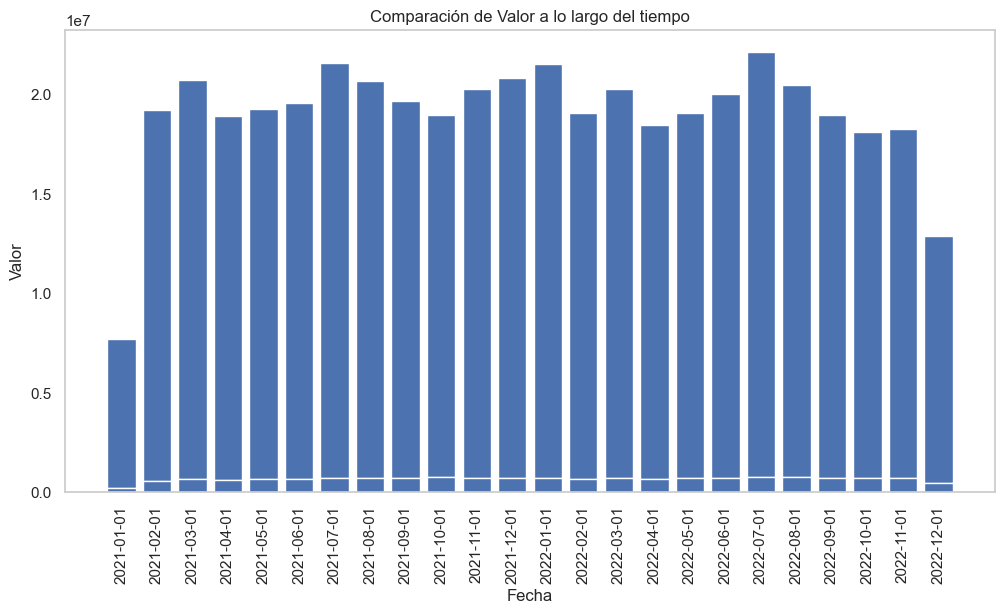

In [116]:
#Pérdidas de transporte
plt.figure(figsize=(12, 6))
colors = sns.color_palette
plt.bar(perdidas_transporte['Fecha'], perdidas_transporte['Valor'])

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de Valor a lo largo del tiempo')
plt.grid()
plt.xticks(rotation=90)

plt.show()

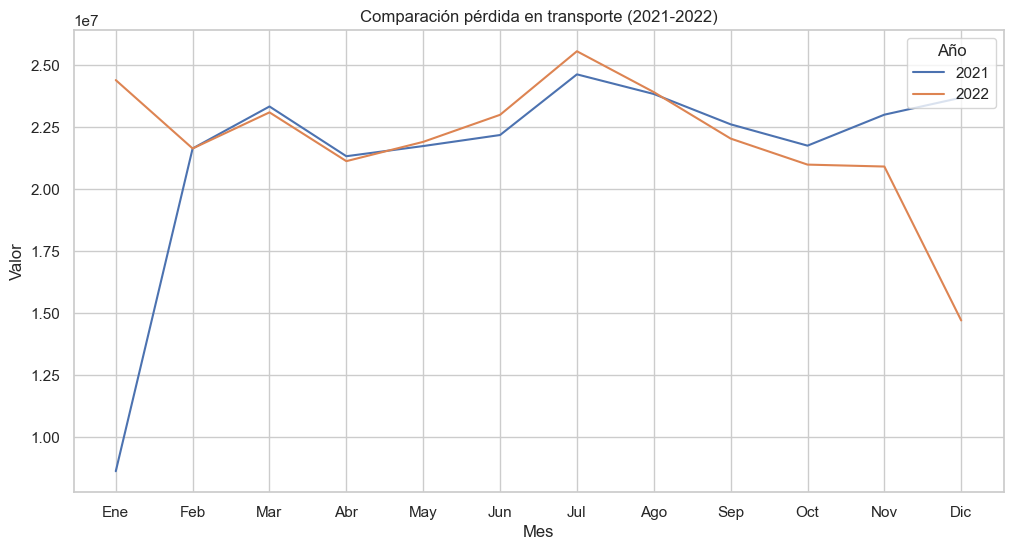

In [122]:
perdidas_transporte['Fecha'] = pd.to_datetime(perdidas_transporte['Fecha'])  
perdidas_transporte['año'] = perdidas_transporte['Fecha'].dt.year
perdidas_transporte['mes'] = perdidas_transporte['Fecha'].dt.month
data_grouped = perdidas_transporte.groupby(['año', 'mes'])['Valor'].sum().reset_index()
plt.figure(figsize=(12, 6))
for año in data_grouped['año'].unique():
    data_año = data_grouped[data_grouped['año'] == año]
    plt.plot(data_año['mes'], data_año['Valor'], label=str(año))
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.title('Comparación pérdida en transporte (2021-2022)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año', loc='upper right')

plt.show()

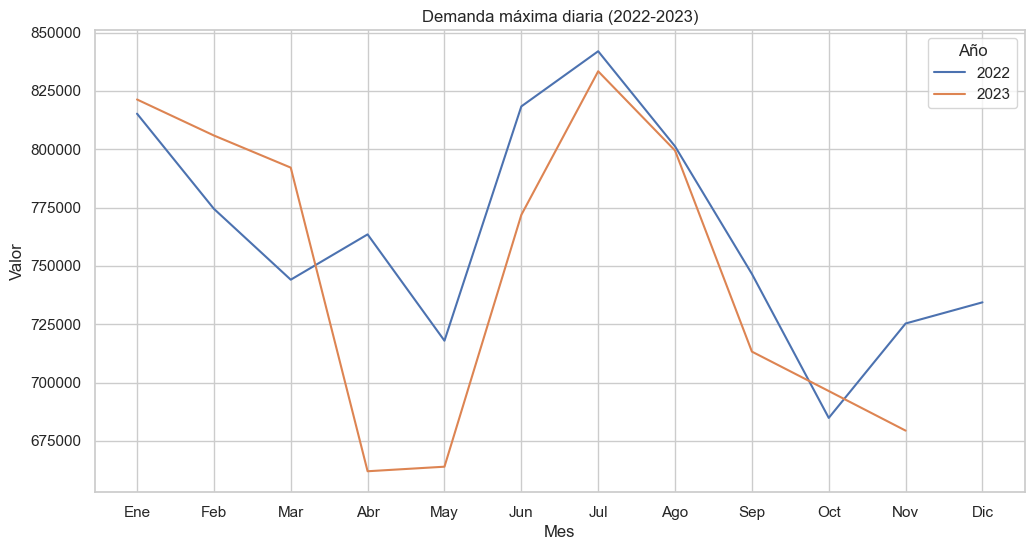

In [123]:
#Demanda máxima diaria
demanda_maxima_diaria['date'] = pd.to_datetime(demanda_maxima_diaria['date'])  
demanda_maxima_diaria['año'] = demanda_maxima_diaria['date'].dt.year
demanda_maxima_diaria['mes'] = demanda_maxima_diaria['date'].dt.month
data_grouped = demanda_maxima_diaria.groupby(['año', 'mes'])['valor'].sum().reset_index()
plt.figure(figsize=(12, 6))
for año in data_grouped['año'].unique():
    data_año = data_grouped[data_grouped['año'] == año]
    plt.plot(data_año['mes'], data_año['valor'], label=str(año))
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.title('Demanda máxima diaria (2022-2023)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año', loc='upper right')

plt.show()

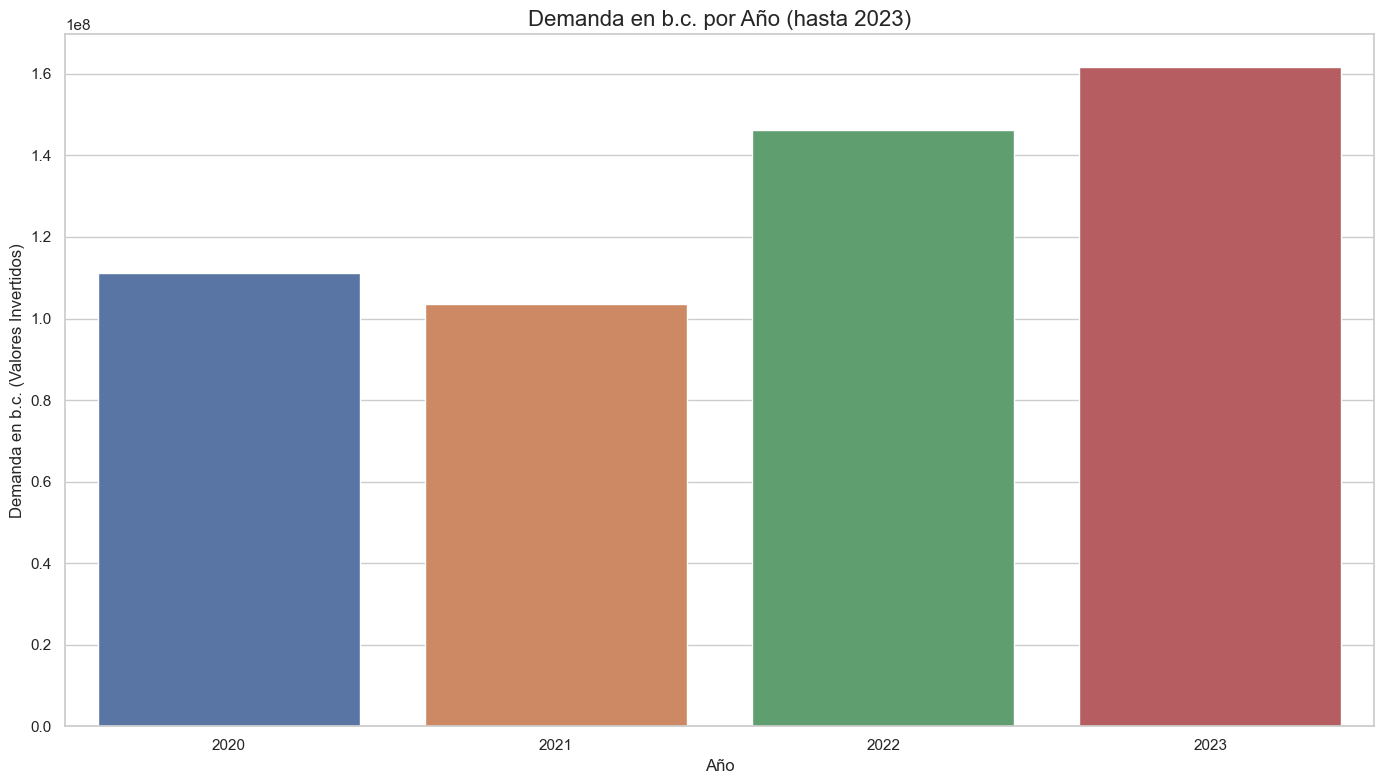

In [124]:
#Demanda por año
# Filtramos el DataFrame para obtener solo los datos de 'demanda en b.c.' y los invertimos para que sean positivos.
demanda_bc_data = balance[balance['Subtipo'] == 'Demanda en b.c.'].copy()
demanda_bc_data['Valores'] = -demanda_bc_data['Valores']

# Nos aseguramos de que la columna 'Fecha' sea de tipo datetime.
demanda_bc_data['Fecha'] = pd.to_datetime(demanda_bc_data['Fecha'])

# Filtramos los datos para excluir cualquier fecha más allá de 2023.
demanda_bc_data = demanda_bc_data[demanda_bc_data['Fecha'].dt.year <= 2023]

# Agrupamos los datos por año y sumamos los valores.
grouped_data = demanda_bc_data.groupby(demanda_bc_data['Fecha'].dt.year).agg({'Valores': 'sum'}).reset_index()

# Creamos el gráfico de barras agrupadas.
plt.figure(figsize=(14, 8))

# Creamos el gráfico de barras con Seaborn, sin diferenciar por comunidad.
sns.barplot(data=grouped_data, x='Fecha', y='Valores', errorbar=None)

# Añadimos títulos y etiquetas apropiadas.
plt.title('Demanda en b.c. por Año (hasta 2023)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Demanda en b.c. (Valores Invertidos)', fontsize=12)

# Ajustamos el layout y mostramos el gráfico.
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

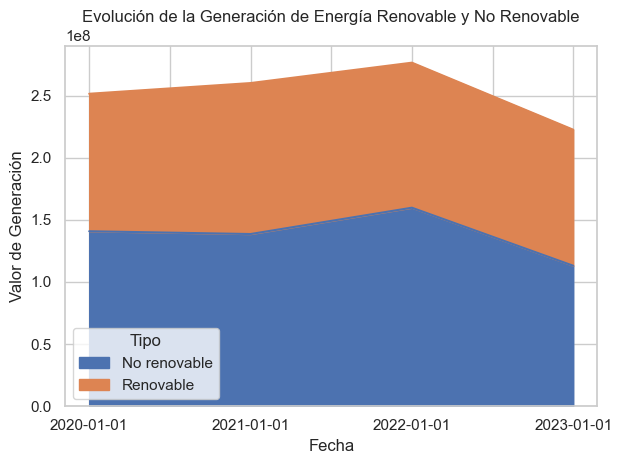

In [127]:
#Evolución de la Generación de Energía Renovable y No Renovable
#Primero, pivotamos el DataFrame para tener las fechas como índice y los tipos como columnas 

pivot_df = tipos_energia.pivot_table(index='Fecha', columns='Tipo', values='Valor', aggfunc='sum')

# Luego, creamos el gráfico de áreas apiladas 

plt.figure(figsize=(12, 6)) 

pivot_df.plot(kind='area', stacked=True) 


# Añadir títulos y etiquetas 


plt.title('Evolución de la Generación de Energía Renovable y No Renovable') 
plt.xlabel('Fecha') 
plt.ylabel('Valor de Generación')

# Mostrar la leyenda y el gráfico plt.legend(title='Tipo de Energía')
plt.tight_layout()
plt.show()


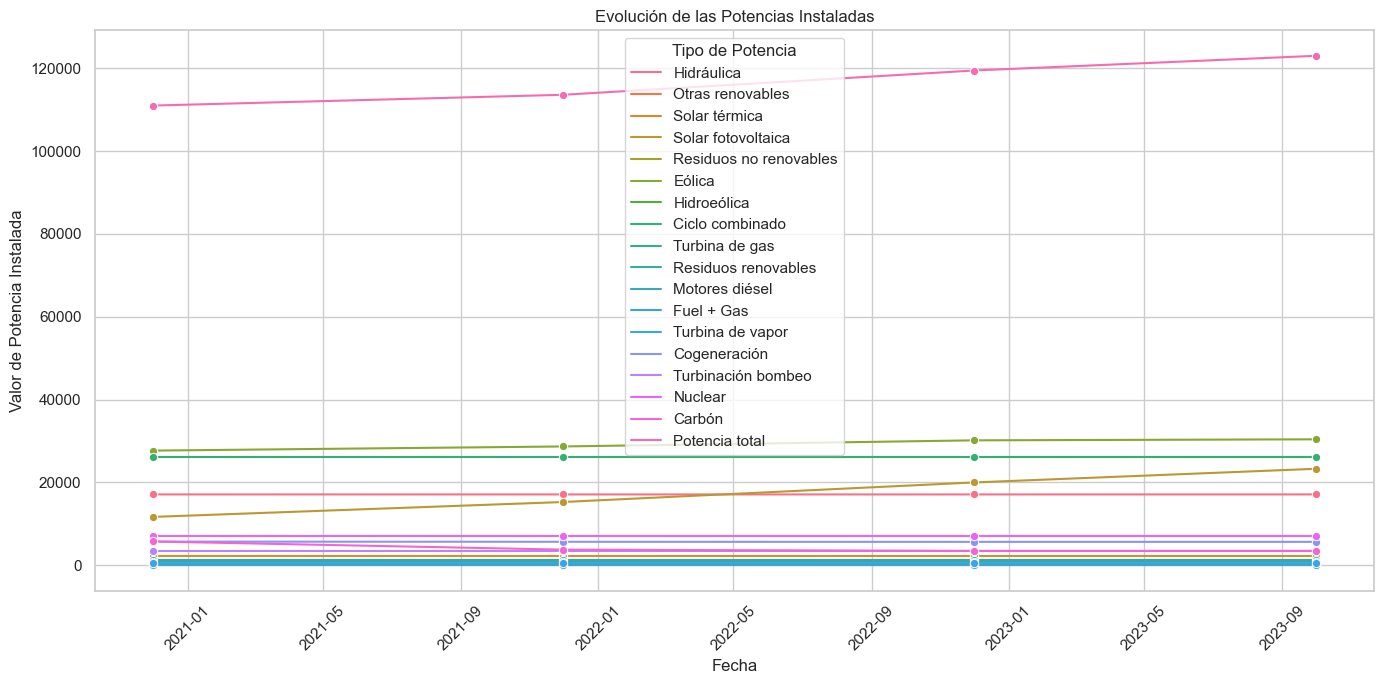

In [129]:
#Evolución potencia instalada

# Primero, ordenamos los datos por fecha 
evol_potencias['Fecha'] = pd.to_datetime(evol_potencias['Fecha']) 
evol_potencias_sorted = evol_potencias.sort_values('Fecha') 



# Crear un gráfico de líneas con Seaborn 
plt.figure(figsize=(14, 7)) 
sns.lineplot(data=evol_potencias_sorted, x='Fecha', y='Valor', hue='Tipo', marker='o') 

# Añadir detalles al gráfico 
plt.title('Evolución de las Potencias Instaladas') 
plt.xlabel('Fecha') 
plt.ylabel('Valor de Potencia Instalada') 
plt.legend(title='Tipo de Potencia') 
plt.xticks(rotation=45)  

# Rotar las etiquetas del eje x para mejor legibilidad 
plt.tight_layout()  

plt.show()

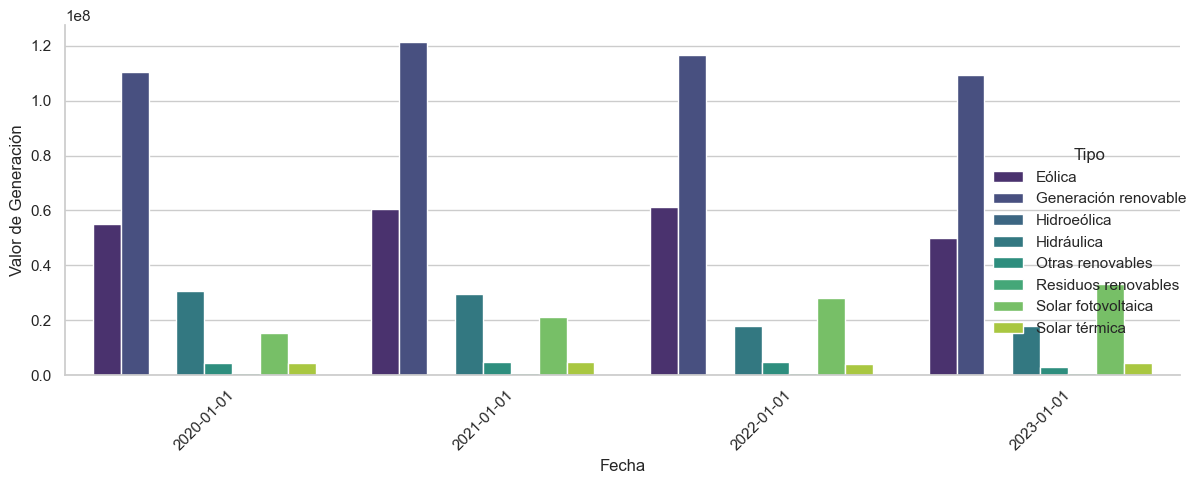

In [132]:
# Agrupamos los datos por 'Fecha' y 'Tipo' para obtener el valor total por tipo de energía y fecha 

energia_renovable_grouped = energia_renovable.groupby(['Fecha', 'Tipo']).sum().reset_index()  

# Creamos el gráfico de barras apiladas 

sns.set(style="whitegrid") 


# Dibujamos cada tipo de energía renovable por fecha 

g = sns.catplot(     
    data=energia_renovable_grouped,     
    x='Fecha', y='Valor', hue='Tipo',     
    kind='bar', height=5, aspect=2, palette='viridis' )  


# Rotamos las etiquetas del eje x para mejor legibilidad 

plt.xticks(rotation=45) 


# Añadimos título y etiquetas plt.title('Evolución de los Tipos de Energía Renovable')
plt.xlabel('Fecha')
plt.ylabel('Valor de Generación')
# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()
